### 1.0 Bibliotecas

In [1]:
import numpy               as np
import pandas              as pd
import matplotlib.pyplot   as plt
import seaborn             as sn


from sklearn.preprocessing        import OneHotEncoder
from sklearn.model_selection      import train_test_split

from google.colab                 import drive

import warnings
warnings.filterwarnings("ignore")

### 2.0 Leitura e importação de registros

In [2]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
df = pd.read_csv('/content/gdrive/MyDrive/Datasets/AdultIncome/adult.csv')
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [4]:
df.tail()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32560,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


## Features description

* age: continuous.
* workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
* fnlwgt: continuous.
* education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
* education-num: continuous.
marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
* relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
* race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
* sex: Female, Male.
* capital-gain: continuous.
* capital-loss: continuous.
* hours-per-week: continuous.
* native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
* class: >50K, <=50K

### 3.0 Tratamento de dados

Certas instâncias estão caracterizadas por "?", logo, espera-se que sejam valores faltantes e tamném não sabemos a quantidade de instâncias como esta pertencem a cada feature do nosso daraframe.

In [5]:
df = df.replace("?", np.nan)

In [6]:
display(df.isnull().sum())
df = df.dropna()
print("\nRetira faltantes...\nTotal de valores faltantes:")
display(df.isnull().sum().sum())

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64


Retira faltantes...
Total de valores faltantes:


0

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30162 entries, 1 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             30162 non-null  int64 
 1   workclass       30162 non-null  object
 2   fnlwgt          30162 non-null  int64 
 3   education       30162 non-null  object
 4   education.num   30162 non-null  int64 
 5   marital.status  30162 non-null  object
 6   occupation      30162 non-null  object
 7   relationship    30162 non-null  object
 8   race            30162 non-null  object
 9   sex             30162 non-null  object
 10  capital.gain    30162 non-null  int64 
 11  capital.loss    30162 non-null  int64 
 12  hours.per.week  30162 non-null  int64 
 13  native.country  30162 non-null  object
 14  income          30162 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


### 4.0 Visualização de dados

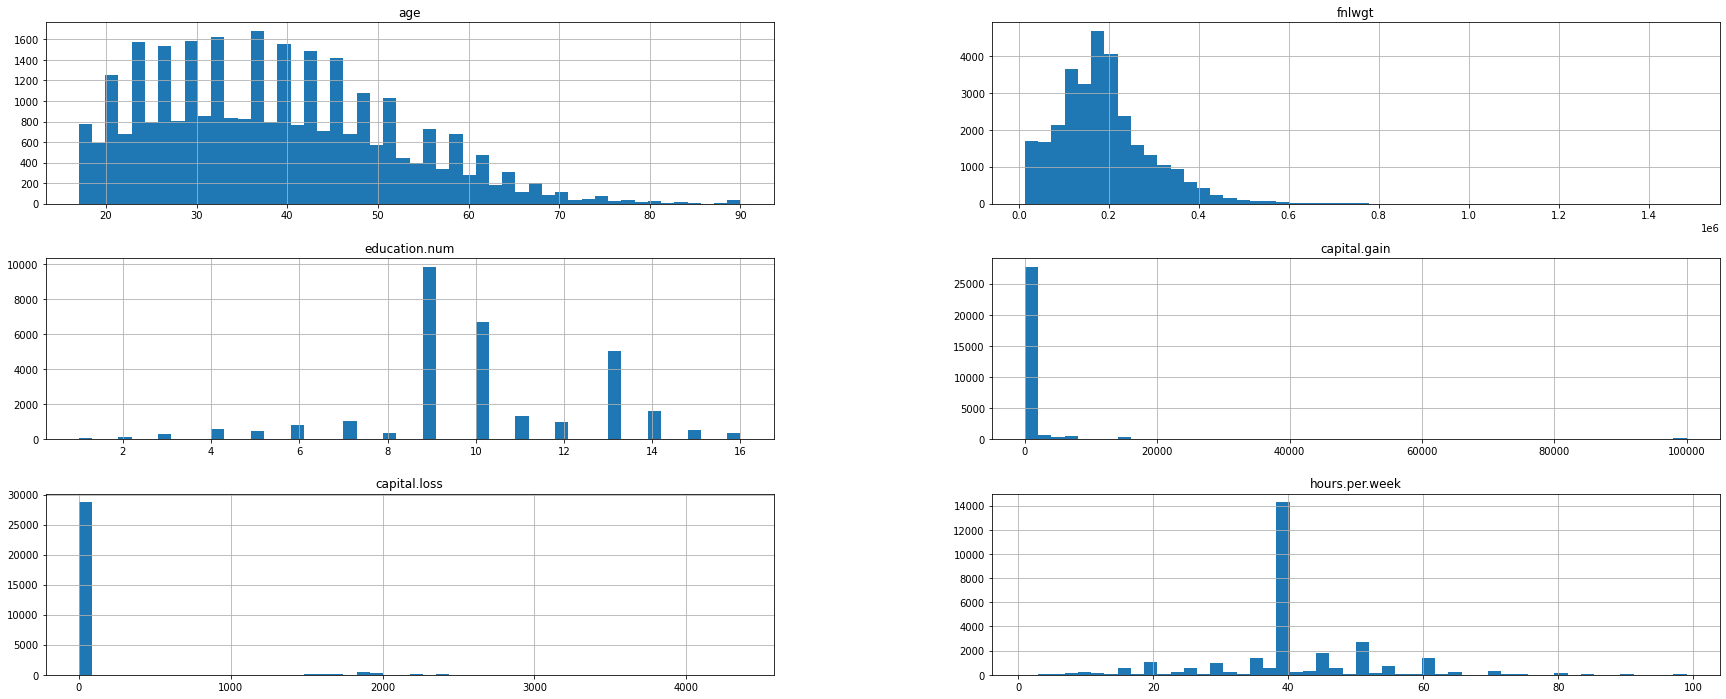

In [8]:
df.hist(bins=50, figsize=(30,12));

* Ao analisar o histograma da distribuição de idades da nossa tabela, conseguimos visualizar que existe uma quantidade consideravel de pessoas de 20 a 50 anos, porém, podemos também visualizar que pode existir certos intervalores de idades que estão fora do comum. Por exemplo, de 30 - 35 anos temos uma quantidade significativa de pessoas.

* Vale salientar, o comportamento de horas de serviço por semana, em que podemos definir uma carga horária comum de 40 - 55 horas de serviço, qual seria a idade e o tipo de serviço que essas pessoas possuem e prestam? 

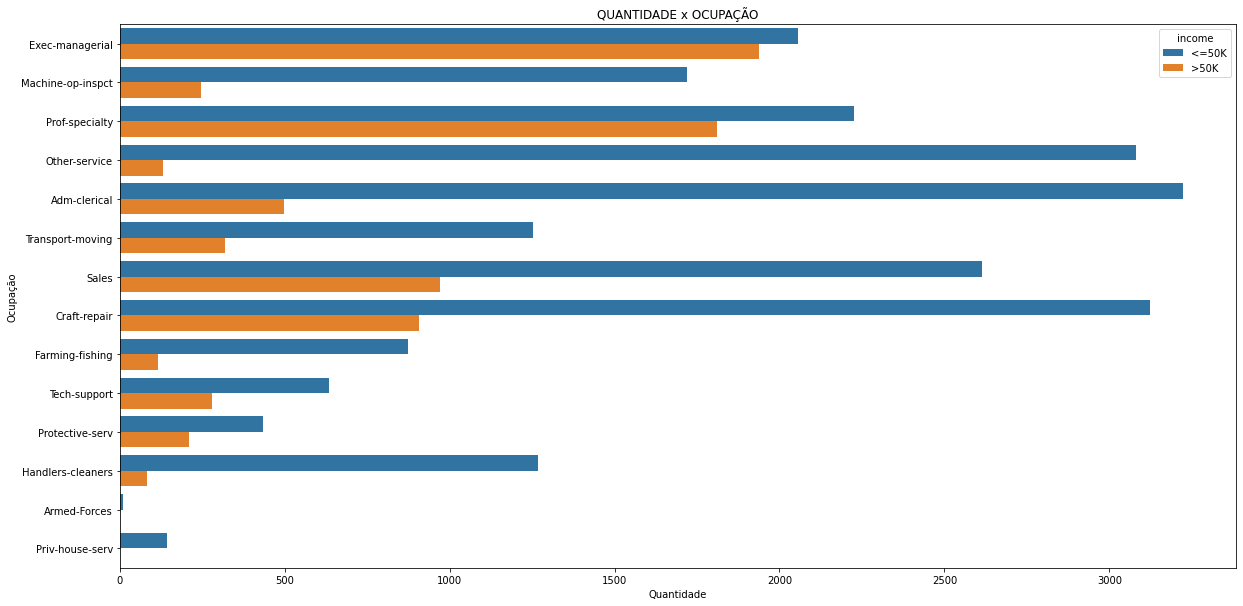

In [9]:
f, ax = plt.subplots(figsize=(20, 10))
sn.countplot(y='occupation', hue='income', data=df, orient='h')
ax.set_title('QUANTIDADE x OCUPAÇÃO', fontsize=12)
ax.set_xlabel('Quantidade', fontsize=10)
ax.set_ylabel('Ocupação', fontsize=10)
ax

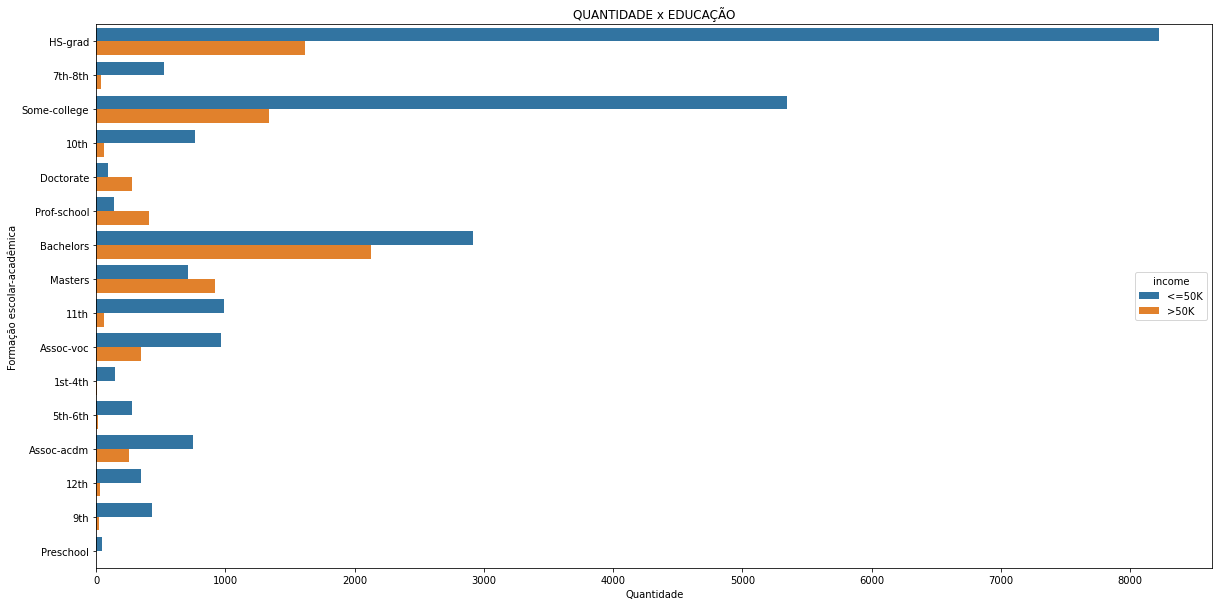

In [10]:
f, ax = plt.subplots(figsize=(20, 10))
sn.countplot(y='education', data=df, orient='h', hue='income')
ax.set_title('QUANTIDADE x EDUCAÇÃO', fontsize=12)
ax.set_xlabel('Quantidade', fontsize=10)
ax.set_ylabel('Formação escolar-acadêmica', fontsize=10)
ax

* Para os dois gráficos acima, me chama a atenção certas características, mostra-se que, para as pessoas que chegam a ter uma renda maior que 50 mil, são pessoas que exercem cargos de especialista e gerência. Porém, vendas me chama atenção, já que de acordo com a quantidade, conquista o terceiro lugar no gráfico. Mas por qual motivo me chama atenção?

* Bom, vamos analisar circuntâncias de escolaridade, uma pessoa que trabalha com vendas não necessariamente precisa ter uma formação acadêmica (o que é importante nós analisarmos juntos). Então, vamos analisar a seguir os seguintes fatores, como a educação pode ou não garantir uma renda maior que 50 mil? 

## Testes e validações

### Teste A/B

In [11]:
trabalha_com_vendas = df.loc[df['occupation']=='Sales']
## Beleza!!! Filtramos todas as pessoas que estão relacionadas a ocução de vendas

## Para que possamos justificar algo, precisamos elaborar um pequeno teste A/B de grupos que possuem graus de escolaridade acima e abaixo da graduação
trabalha_com_vendas['education'].value_counts()

## Existe certas características que fogem do meu entendimento, então iremos focar nas principais escolaridades
muda_valores = {
    'HS-grad':'Graduado',
    'Some-college':'Ensino_Medio'
}

trabalha_com_vendas['education'] = trabalha_com_vendas['education'].replace(muda_valores)
trabalha_com_vendas = trabalha_com_vendas.loc[trabalha_com_vendas['education'].isin(['Graduado','Ensino_Medio'])]

In [12]:
#O nosso grupo de controçle será as pessoas que não possuem Graduação
grupo_de_controle = trabalha_com_vendas.loc[trabalha_com_vendas['education'] == 'Ensino_Medio']
grupo_de_controle = grupo_de_controle.sample(frac = 0.45)

#O grupo experimental será das pessoas que de alguma forma conseguiram a oportunidade/tiveram o privilégio de garantir uma vaga na faculdade
grupo_experimental = trabalha_com_vendas.loc[trabalha_com_vendas['education'] == 'Graduado']
grupo_experimental = grupo_experimental.sample(frac = 0.45)

In [13]:
display(grupo_de_controle.shape, grupo_experimental.shape)

(448, 15)

(473, 15)